In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spotify_data.csv')
print(df.shape)
df.head()


(204, 15)


,name,artist,duration_ms,popularity,added_date,id,Danceability,Energy,Instrumentalness,Loudness,speechiness,tempo,valence,acousticness,mode
0,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-26T08:38:00Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.843000,-12.888,0.0347,83.101,0.607,0.0599,0
1,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-26T08:38:00Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.843000,-12.888,0.0347,83.101,0.607,0.0599,0
2,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-05T09:07:33Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.843000,-12.888,0.0347,83.101,0.607,0.0599,0
3,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-05T09:07:33Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.843000,-12.888,0.0347,83.101,0.607,0.0599,0
4,Ağlama ben ağlarım,Canozan,191694,80,2023-12-26T08:38:06Z,0JU2QfhTrgFsVq5yQ4YQlu,0.416,0.473,0.000001,-9.726,0.0351,118.354,0.167,0.5530,0


In [3]:
# Sütun adlarını değiştir
df.rename(columns={'Danceability' : 'danceability',
                   'Energy' : 'energy',
                   'Instrumentalness': 'instrumentalness'} , inplace=True)

In [4]:
df.shape

(204, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              204 non-null    object 
 1   artist            204 non-null    object 
 2   duration_ms       204 non-null    int64  
 3   popularity        204 non-null    int64  
 4   added_date        204 non-null    object 
 5   id                204 non-null    object 
 6   danceability      204 non-null    float64
 7   energy            204 non-null    float64
 8   instrumentalness  204 non-null    float64
 9   Loudness          204 non-null    float64
 10  speechiness       204 non-null    float64
 11  tempo             204 non-null    float64
 12  valence           204 non-null    float64
 13  acousticness      204 non-null    float64
 14  mode              204 non-null    int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 24.0+ KB


In [6]:
df.duplicated().sum()

18

In [7]:
# 'id' sütunundaki tekrarlanan satırları bul ve hepsini getirir
df[df.duplicated('id', keep=False)].head()

,name,artist,duration_ms,popularity,added_date,id,danceability,energy,instrumentalness,Loudness,speechiness,tempo,valence,acousticness,mode
0,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-26T08:38:00Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.8430,-12.888,0.0347,83.101,0.607,0.0599,0
1,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-26T08:38:00Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.8430,-12.888,0.0347,83.101,0.607,0.0599,0
2,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-05T09:07:33Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.8430,-12.888,0.0347,83.101,0.607,0.0599,0
3,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-05T09:07:33Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.8430,-12.888,0.0347,83.101,0.607,0.0599,0
19,En Güzel Yerinde Evin,Büyük Ev Ablukada,241013,53,2023-12-26T08:39:09Z,53YCEHCI1hV6cp4Qn0OlaZ,0.406,0.180,0.0123,-18.302,0.0397,100.528,0.208,0.9680,0


In [8]:
# 'id' sütununa göre tekrarlanan satırları siler, ilk bulunanu korur
df.drop_duplicates(subset='id', keep='first', inplace=True)

# İndeksleri sıfırdan başlayacak şekilde resetler
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,name,artist,duration_ms,popularity,added_date,id,danceability,energy,instrumentalness,Loudness,speechiness,tempo,valence,acousticness,mode
0,Anemone,The Brian Jonestown Massacre,334466,59,2023-12-26T08:38:00Z,70WSr32oW4jC1na5I0j0D6,0.527,0.636,0.843000,-12.888,0.0347,83.101,0.607,0.0599,0
1,Ağlama ben ağlarım,Canozan,191694,80,2023-12-26T08:38:06Z,0JU2QfhTrgFsVq5yQ4YQlu,0.416,0.473,0.000001,-9.726,0.0351,118.354,0.167,0.5530,0
2,Kırık Ayna,Cihat Akbel,128391,32,2023-12-26T08:38:11Z,4FWTxZMrfs4EykvjhkIRjV,0.515,0.678,0.005910,-7.894,0.1740,124.847,0.880,0.5840,0
3,Tek Başına,Erkin Koray,297200,19,2023-12-26T08:38:16Z,0CrzShyasw5dgt2mZoYAxW,0.395,0.759,0.000000,-9.705,0.1270,171.224,0.587,0.2370,0
4,Beklediğim Gibiyim,Büyük Ev Ablukada,236631,56,2023-12-26T08:38:20Z,4U0mwukUqiKG9ucB4f2Ex8,0.746,0.562,0.747000,-11.574,0.0676,106.076,0.642,0.0737,0


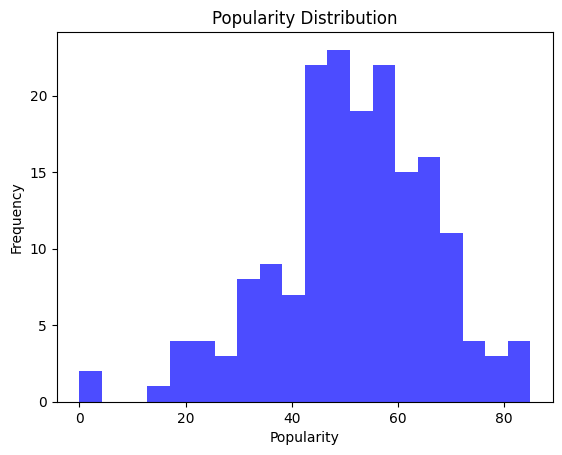

In [10]:
# 'popularity' sütunundaki verilerin histogramı
plt.hist(df['popularity'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show()

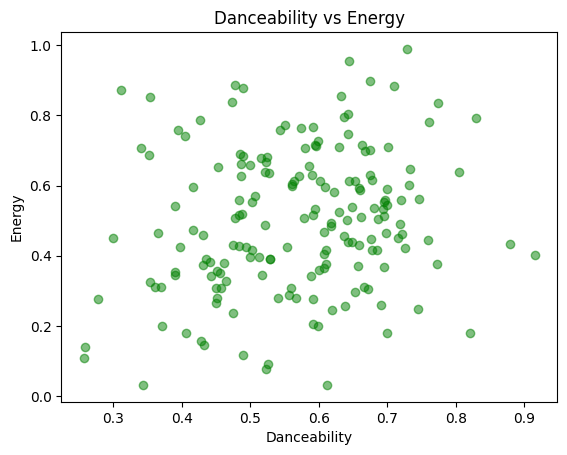

In [11]:
# 'danceability' ve 'energy' sütunları arasındaki ilişkiyi gösteren scatter plot'u oluşturur
plt.scatter(df['danceability'], df['energy'], color='green', alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs Energy')
plt.show()

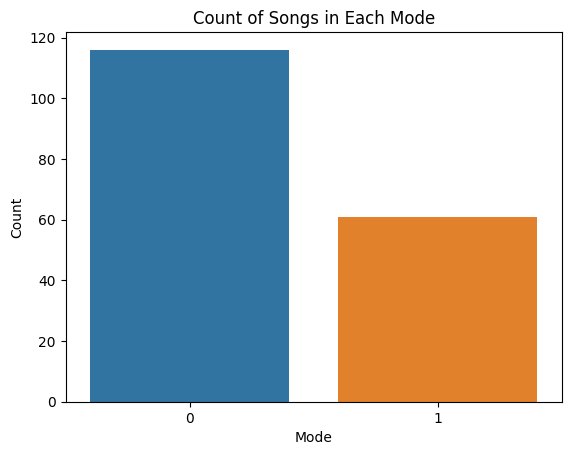

In [12]:
# 'mode' sütunundaki verilere göre count plot (sayım grafiği) oluşturur
sns.countplot(x='mode', data=df)
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Count of Songs in Each Mode')
plt.show()

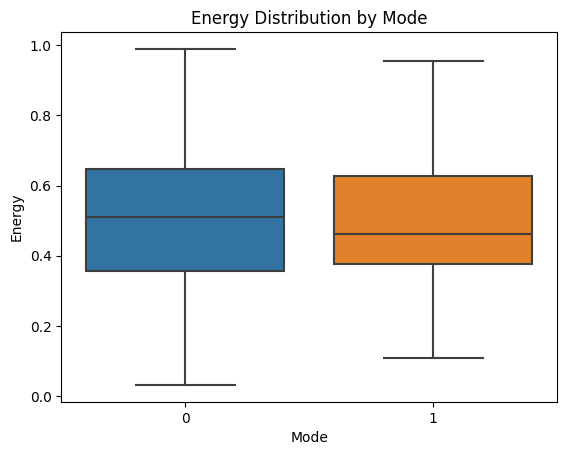

In [13]:
# 'mode' sütununa göre 'energy' sütunundaki verilerin kutu grafiğini oluştur
sns.boxplot(x='mode', y='energy', data=df)
plt.xlabel('Mode')
plt.ylabel('Energy')
plt.title('Energy Distribution by Mode')
plt.show()

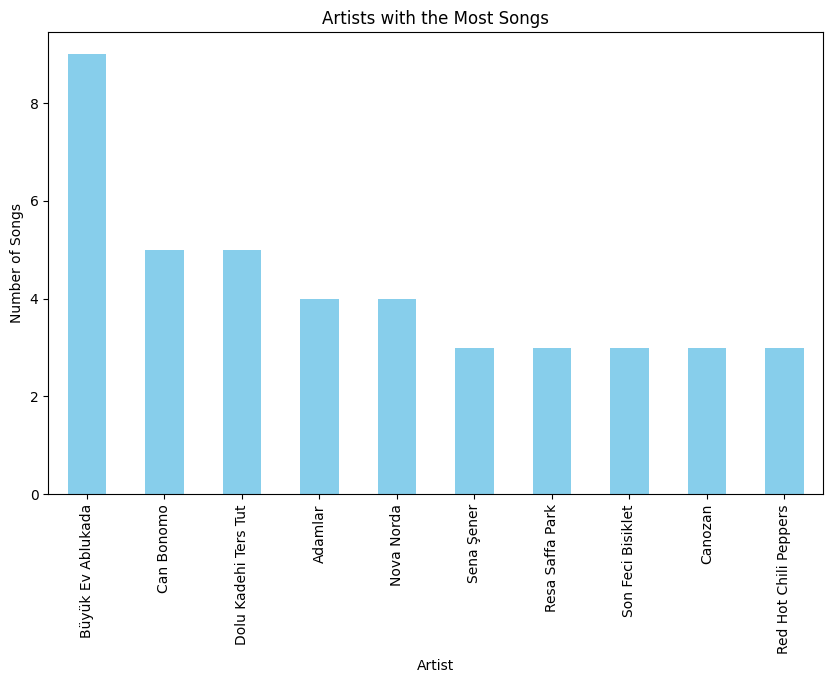

In [24]:
def plot_artist_song_counts(dataframe, top_n=10, figsize=(10, 6), bar_color='skyblue'):
    # Sanatçı bazında şarkı sayılarını hesapla
    artist_song_counts = dataframe['artist'].value_counts()

    # Görselleştirme
    plt.figure(figsize=figsize)
    artist_song_counts[:top_n].plot(kind='bar', color=bar_color)
    plt.title('Artists with the Most Songs')
    plt.xlabel('Artist')
    plt.ylabel('Number of Songs')

plot_artist_song_counts(df)


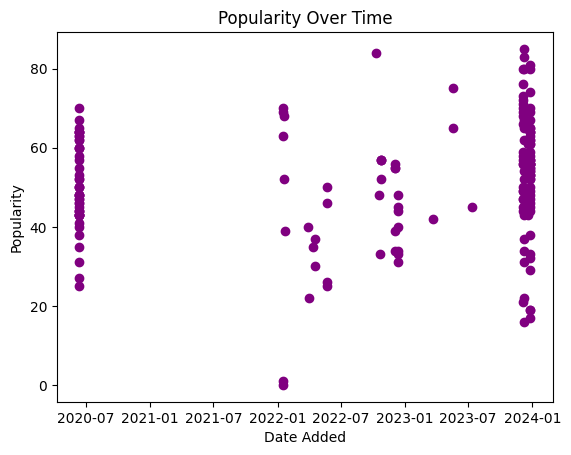

In [22]:
# müzik parçalarının ekleme zamanı içindeki popülerlik seviyelerini gösterir
def plot_popularity_over_time(dataframe):
    dataframe['added_date'] = pd.to_datetime(dataframe['added_date'])
    plt.scatter(dataframe['added_date'], dataframe['popularity'], color='purple', marker='o')
    plt.xlabel('Date Added')
    plt.ylabel('Popularity')
    plt.title('Popularity Over Time')

plot_popularity_over_time(df)
